In [1]:
!pip install optuna
!pip install catboost
!apt-get -qq install eli5
!apt-get -qq install eli5.sklearn
!apt-get -qq install PermutationImportance
from scipy import stats
impor pandas as pd
import numpy as np
import base64,os,random,gc
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import matplotlib.pyplot as plotter
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import optuna
import xgboost as xgb
from xgboost import XGBClassifier

import catboost
from catboost import CatBoostClassifier
import lightgbm as lgbm
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone
from sklearn.model_selection import KFold
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn import datasets
optuna.logging.set_verbosity(optuna.logging.WARNING)
from lightgbm import *
pd.set_option("display.max_columns", None)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings('ignore')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00
E: Unable to locate package eli5
E: Unable to locate package eli5.sklearn
E: Couldn't find any package by glob 'eli5.sklearn'
E: Couldn't find any package by regex 'eli5.sklearn'
E: Unable to locate package PermutationImportance


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
train =pd.read_csv('/content/OCD Patient Dataset_ Demographics & Clinical Data.csv')

In [3]:
display(train.head())

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


train


,0
Patient ID,0
Age,0
Gender,0
Ethnicity,0
Marital Status,0
Education Level,0
OCD Diagnosis Date,0
Duration of Symptoms (months),0
Previous Diagnoses,248
Family History of OCD,0


,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,Male,Hispanic,Divorced,College Degree,2019-01-10,53,MDD,No,Contamination,Washing,21,33,Yes,Yes,SSRI
1496,5013,19,Female,Hispanic,Divorced,Graduate Degree,2022-09-14,160,GAD,Yes,Hoarding,Praying,25,16,Yes,Yes,SSRI
1497,6089,40,Male,Asian,Married,Some College,2018-03-13,100,NaN,Yes,Contamination,Counting,2,15,Yes,Yes,Benzodiazepine
1498,3808,37,Female,Caucasian,Married,Some College,2018-04-14,210,GAD,Yes,Contamination,Washing,16,7,Yes,No,Benzodiazepine


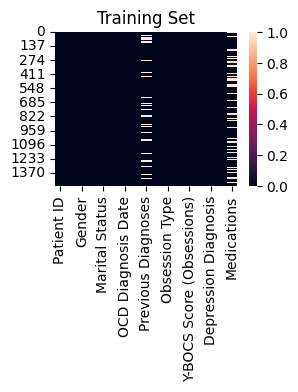

In [4]:
print('train')
display(train.isnull().sum())
plt.figure(figsize = (10, 2))
plt.subplot(1, 3, 1)
plt.title("Training Set")
sns.heatmap(train.isnull())
train

<Axes: >

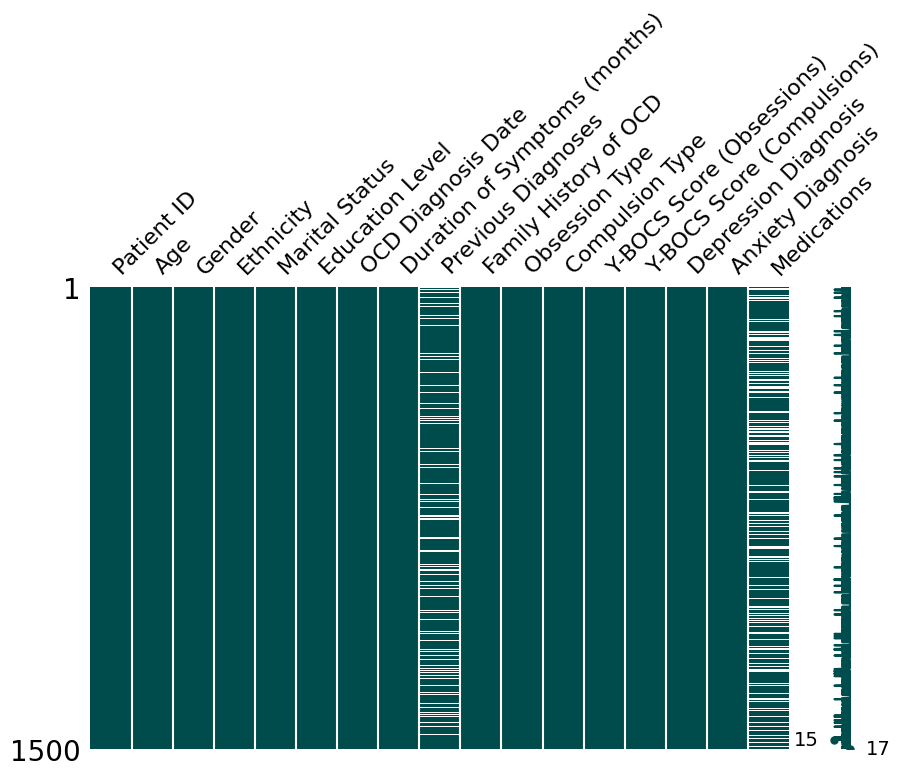

In [5]:
msno.matrix(df=train, figsize=(10,6), color=(0,.3,.3))

In [6]:
#train['Medications'] = train['Medications'].fillna('Unknown')
#train
print('train')
display(train.info())

train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Patient ID                     1500 non-null   int64 
 1   Age                            1500 non-null   int64 
 2   Gender                         1500 non-null   object
 3   Ethnicity                      1500 non-null   object
 4   Marital Status                 1500 non-null   object
 5   Education Level                1500 non-null   object
 6   OCD Diagnosis Date             1500 non-null   object
 7   Duration of Symptoms (months)  1500 non-null   int64 
 8   Previous Diagnoses             1252 non-null   object
 9   Family History of OCD          1500 non-null   object
 10  Obsession Type                 1500 non-null   object
 11  Compulsion Type                1500 non-null   object
 12  Y-BOCS Score (Obsessions)      1500 non-null   int64 
 1

None

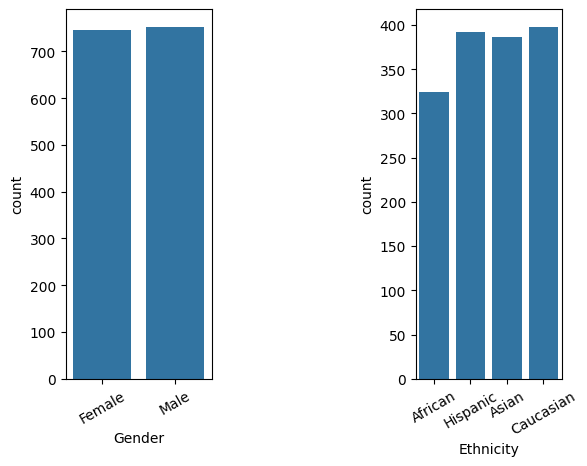

In [7]:
plt.subplot(1, 3, 1)
sns.countplot(x = train["Gender"])
plotter.xticks(rotation = 30);
plt.subplot(1, 3, 3)
sns.countplot(x = train["Ethnicity"])
plotter.xticks(rotation = 30);

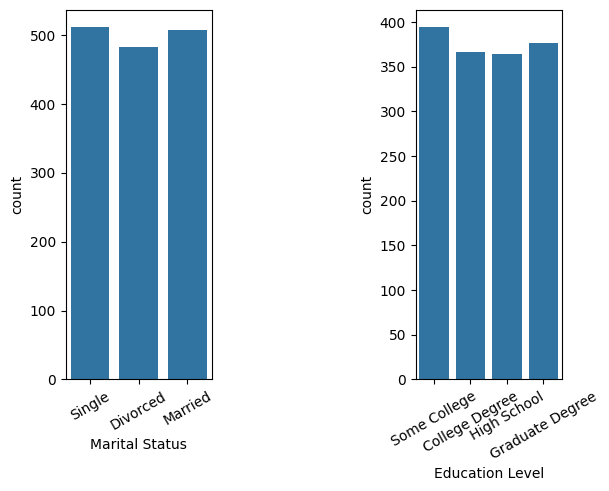

In [8]:
plt.subplot(1, 3, 1)
sns.countplot(x = train["Marital Status"])
plotter.xticks(rotation = 30);
plt.subplot(1, 3, 3)
sns.countplot(x = train["Education Level"])
plotter.xticks(rotation = 30);

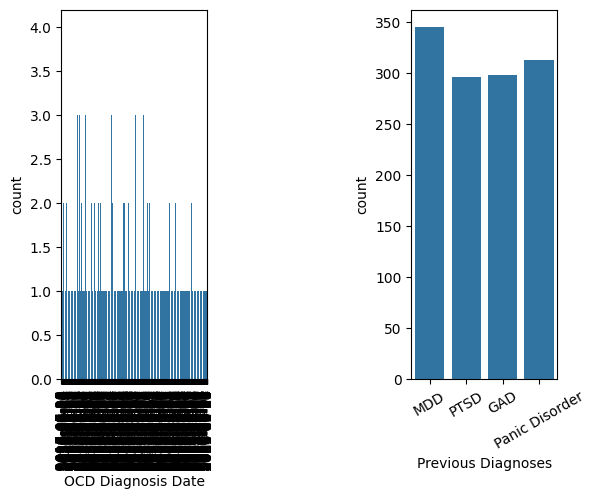

In [9]:
plt.subplot(1, 3, 1)
sns.countplot(x = train["OCD Diagnosis Date"])
plotter.xticks(rotation = 90);
plt.subplot(1, 3, 3)
sns.countplot(x = train["Previous Diagnoses"])
plotter.xticks(rotation = 30);

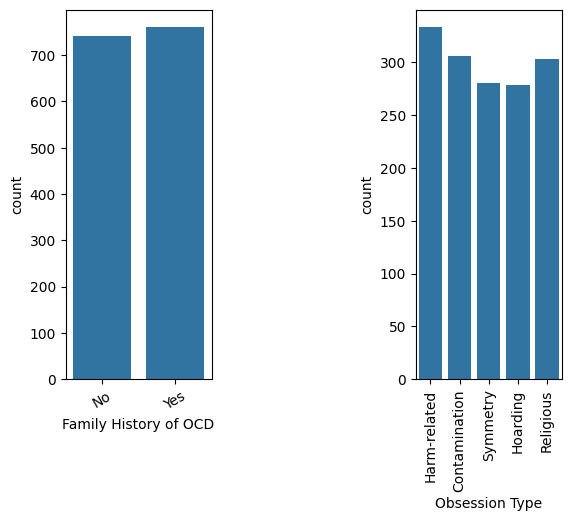

In [10]:
plt.subplot(1, 3, 1)
sns.countplot(x = train["Family History of OCD"])
plotter.xticks(rotation = 30);
plt.subplot(1, 3, 3)
sns.countplot(x = train["Obsession Type"])
plotter.xticks(rotation = 90);

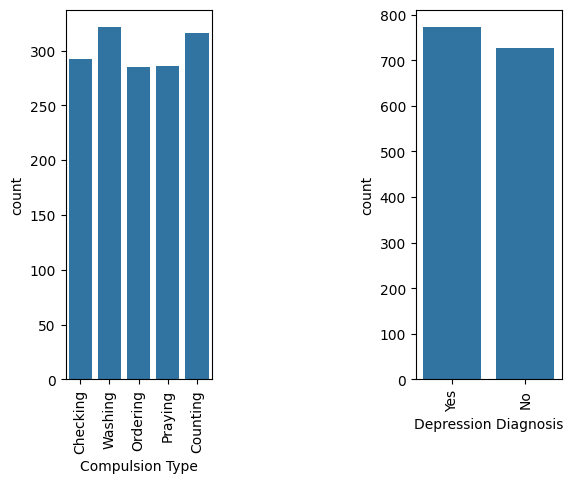

In [11]:
plt.subplot(1, 3, 1)
sns.countplot(x = train["Compulsion Type"])
plotter.xticks(rotation = 90);
plt.subplot(1, 3, 3)
sns.countplot(x = train["Depression Diagnosis"])
plotter.xticks(rotation = 90);

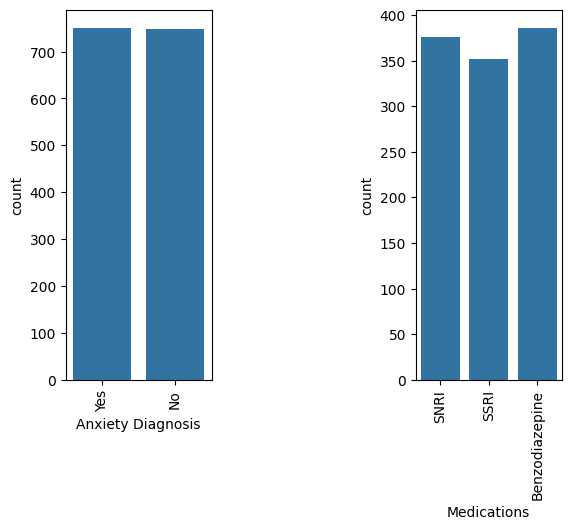

In [12]:
plt.subplot(1, 3, 1)
sns.countplot(x = train["Anxiety Diagnosis"])
plotter.xticks(rotation = 90);
plt.subplot(1, 3, 3)
sns.countplot(x = train["Medications"])
plotter.xticks(rotation = 90);

In [13]:
train["Gender"] = train["Gender"].replace({'Female':1,'Male':2})
train["Ethnicity"] =train["Ethnicity"].replace({'African':1,'Hispanic':2,'Asian':3,'Caucasian':4})
train["Marital Status"] = train["Marital Status"].replace({'Single':1,'Divorced':2,'Married':3})
train["Education Level"] = train["Education Level"].replace ("{ 'SomeCollege' :1,'College Degree':2 'High School':3,'Graduate Degree':4}")
train=train.drop(columns=['OCD Diagnosis Date'],axis=1)
train["Previous Diagnoses"] = train["Previous Diagnoses"].replace({'MDD':1,'PTSD':2,'GAD':3,'Panic Disorder':4})
train["Family History of OCD"] = train["Family History of OCD"].replace({'No':1,'Yes':2})
train["Obsession Type"] = train["Obsession Type"].replace({'Harm-related':1,'Contamination':2,'Symmetry':3,
'Hoarding':4,'Religious':5})
train["Compulsion Type"] = train["Compulsion Type"].replace({'Checking':1,'Washing':2,'Ordering':3,'Praying':4,'Counting':5})
train["Depression Diagnosis"] = train["Depression Diagnosis"].replace({'No':1,'Yes':2})
train["Anxiety Diagnosis"] = train["Anxiety Diagnosis"].replace({'No':1,'Yes':2})
train["Medications"] =train["Medications"].replace({'SNRI':0,'SSRI':1,'Benzodiazepine':2})
display(train)


,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,1,1,1,Some College,203,1.0,1,1,1,17,10,2,2,0.0
1,2406,69,2,1,2,Some College,180,NaN,2,1,2,21,25,2,2,1.0
2,1188,57,2,2,2,College Degree,173,1.0,1,2,1,3,4,1,1,2.0
3,6200,27,1,2,3,College Degree,126,2.0,2,3,2,14,28,2,2,1.0
4,5824,56,1,2,3,High School,168,2.0,2,4,3,39,18,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,2,2,2,College Degree,53,1.0,1,2,2,21,33,2,2,1.0
1496,5013,19,1,2,2,Graduate Degree,160,3.0,2,4,4,25,16,2,2,1.0
1497,6089,40,2,3,3,Some College,100,NaN,2,2,5,2,15,2,2,2.0
1498,3808,37,1,4,3,Some College,210,3.0,2,2,2,16,7,2,1,2.0


In [14]:
print("Skewness: %f" % train['Previous Diagnoses'].skew())
print("Kurtosis: %f" % train['Previous Diagnoses'].kurt())

Skewness: 0.040787
Kurtosis: -1.409371


In [15]:
from sklearn.impute import SimpleImputer
num_cols = ['Previous Diagnoses']
num_imp = SimpleImputer(strategy='mean')
train[num_cols] =pd.DataFrame(num_imp.fit_transform(train[num_cols]),columns=num_cols)
train


,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,1,1,1,Some College,203,1.00000,1,1,1,17,10,2,2,0.0
1,2406,69,2,1,2,Some College,180,2.46246,2,1,2,21,25,2,2,1.0
2,1188,57,2,2,2,College Degree,173,1.00000,1,2,1,3,4,1,1,2.0
3,6200,27,1,2,3,College Degree,126,2.00000,2,3,2,14,28,2,2,1.0
4,5824,56,1,2,3,High School,168,2.00000,2,4,3,39,18,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,2,2,2,College Degree,53,1.00000,1,2,2,21,33,2,2,1.0
1496,5013,19,1,2,2,Graduate Degree,160,3.00000,2,4,4,25,16,2,2,1.0
1497,6089,40,2,3,3,Some College,100,2.46246,2,2,5,2,15,2,2,2.0
1498,3808,37,1,4,3,Some College,210,3.00000,2,2,2,16,7,2,1,2.0


In [16]:
train=train.dropna(axis=0,how='any')
train

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,1,1,1,Some College,203,1.00000,1,1,1,17,10,2,2,0.0
1,2406,69,2,1,2,Some College,180,2.46246,2,1,2,21,25,2,2,1.0
2,1188,57,2,2,2,College Degree,173,1.00000,1,2,1,3,4,1,1,2.0
3,6200,27,1,2,3,College Degree,126,2.00000,2,3,2,14,28,2,2,1.0
5,6946,32,1,3,3,College Degree,46,3.00000,1,4,3,26,11,2,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5374,38,2,2,2,College Degree,53,1.00000,1,2,2,21,33,2,2,1.0
1496,5013,19,1,2,2,Graduate Degree,160,3.00000,2,4,4,25,16,2,2,1.0
1497,6089,40,2,3,3,Some College,100,2.46246,2,2,5,2,15,2,2,2.0
1498,3808,37,1,4,3,Some College,210,3.00000,2,2,2,16,7,2,1,2.0


<Axes: >

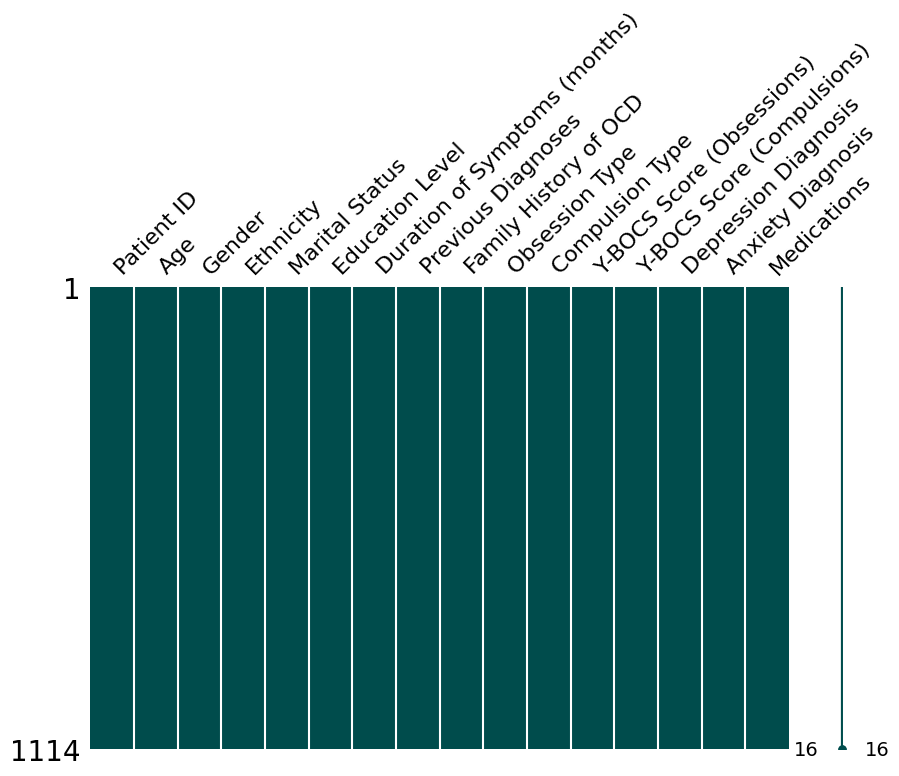

In [17]:
msno.matrix(df=train, figsize=(10,6), color=(0,.3,.3))

In [18]:
train_feature = train.columns.drop('Medications').tolist()
train_feature

['Patient ID',
 'Age',
 'Gender',
 'Ethnicity',
 'Marital Status',
 'Education Level',
 'Duration of Symptoms (months)',
 'Previous Diagnoses',
 'Family History of OCD',
 'Obsession Type',
 'Compulsion Type',
 'Y-BOCS Score (Obsessions)',
 'Y-BOCS Score (Compulsions)',
 'Depression Diagnosis',
 'Anxiety Diagnosis']

In [ ]:
train[train_feature].describe().T\
.style.bar(subset=['mean'], color=px.colors.qualitative.G10[0])\
.background_gradient(subset=['std'], cmap='BuPu')\
.background_gradient(subset=['50%'], cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
Patient ID,1114.000000,5546.394973,2568.490997,1017.000000,3334.750000,5607.000000,7757.500000,9995.000000
Age,1114.000000,46.660682,16.889784,18.000000,32.000000,47.000000,61.000000,75.000000
Gender,1114.000000,1.500898,0.500224,1.000000,1.000000,2.000000,2.000000,2.000000
Ethnicity,1114.000000,2.582585,1.091049,1.000000,2.000000,3.000000,4.000000,4.000000
Marital Status,1114.000000,1.987433,0.820790,1.000000,1.000000,2.000000,3.000000,3.000000
Duration of Symptoms (months),1114.000000,123.126571,67.473845,6.000000,65.000000,123.000000,179.000000,239.000000
Previous Diagnoses,1114.000000,2.441118,1.033862,1.000000,2.000000,2.462460,3.000000,4.000000
Family History of OCD,1114.000000,1.512567,0.500067,1.000000,1.000000,2.000000,2.000000,2.000000
Obsession Type,1114.000000,2.891382,1.439981,1.000000,2.000000,3.000000,4.000000,5.000000
Compulsion Type,1114.000000,3.038600,1.422872,1.000000,2.000000,3.000000,4.000000,5.000000


<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

<Figure size 1500x300 with 0 Axes>

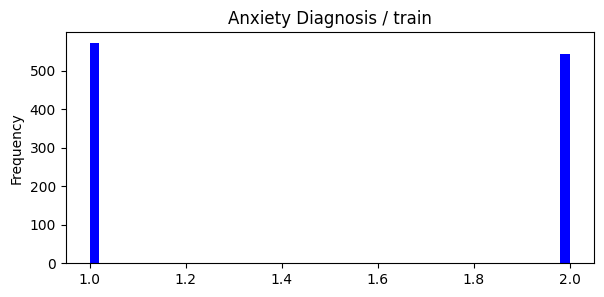

In [19]:
for feat in train_feature:plt.figure(figsize=(15,3))
ax1 = plt.subplot(1,2,1)
train[feat].plot(kind='hist', bins=50, color='blue')
plt.title(feat + ' / train')
plt.show()

In [20]:
print("Skewness: %f" % train['Age'].skew())
print("Kurtosis: %f" % train['Age'].kurt())
print("Skewness: %f" % train['Gender'].skew())
print("Kurtosis: %f" % train['Gender'].kurt())
print("Skewness: %f" % train['Ethnicity'].skew())
print("Kurtosis: %f" % train['Ethnicity'].kurt())
print("Skewness: %f" % train['Marital Status'].skew())
print("Kurtosis: %f" % train['Marital Status'].kurt())

print("Skewness: %f" % train['Duration of Symptoms (months)'].skew())
print("Kurtosis: %f" % train['Duration of Symptoms (months)'].kurt())
print("Skewness: %f" % train['Previous Diagnoses'].skew())
print("Kurtosis: %f" % train['Previous Diagnoses'].kurt())
print("Skewness: %f" % train['Family History of OCD'].skew())
print("Kurtosis: %f" % train['Family History of OCD'].kurt())
print("Skewness: %f" % train['Obsession Type'].skew())
print("Kurtosis: %f" % train['Obsession Type'].kurt())
print("Skewness: %f" % train['Compulsion Type'].skew())
print("Kurtosis: %f" % train['Compulsion Type'].kurt())
print("Skewness: %f" % train['Y-BOCS Score (Obsessions)'].skew())
print("Kurtosis: %f" % train['Y-BOCS Score (Obsessions)'].kurt())
print("Skewness: %f" % train['Y-BOCS Score (Compulsions)'].skew())
print("Kurtosis: %f" % train['Y-BOCS Score (Compulsions)'].kurt())
print("Skewness: %f" % train['Depression Diagnosis'].skew())
print("Kurtosis: %f" % train['Depression Diagnosis'].kurt())
print("Skewness: %f" % train['Anxiety Diagnosis'].skew())
print("Kurtosis: %f" % train['Anxiety Diagnosis'].kurt())


Skewness: 0.006356
Kurtosis: -1.204796
Skewness: -0.003596
Kurtosis: -2.003587
Skewness: -0.089318
Kurtosis: -1.291406
Skewness: 0.023231
Kurtosis: -1.515368
Skewness: -0.014410
Kurtosis: -1.201152
Skewness: 0.054362
Kurtosis: -1.067981
Skewness: -0.050353
Kurtosis: -2.001060
Skewness: 0.112878
Kurtosis: -1.338223
Skewness: 0.008749
Kurtosis: -1.318512
Skewness: 0.000971
Kurtosis: -1.182194
Skewness: 0.023188
Kurtosis: -1.203450
Skewness: -0.158698
Kurtosis: -1.978370
Skewness: 0.050353
Kurtosis: -2.001060


In [21]:
X_data_feature= train.drop(columns=['Medications'],axis=1)
y_data_feature= train['Medications']
model = [XGBClassifier()]

num_chr = [12, 12, 10]

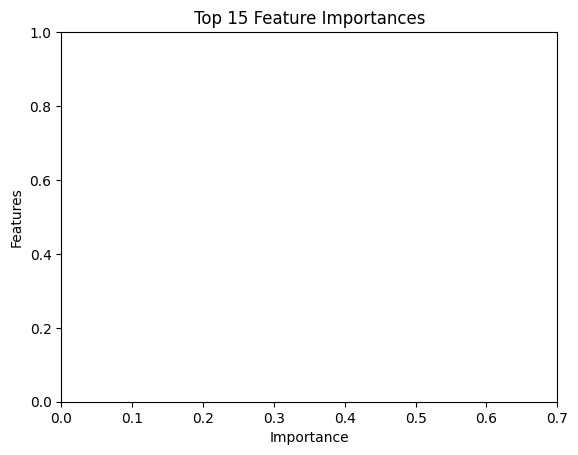

Patient ID                       0
Age                              0
Gender                           0
Ethnicity                        0
Marital Status                   0
Education Level                  0
Duration of Symptoms (months)    0
Previous Diagnoses               0
Family History of OCD            0
Obsession Type                   0
Compulsion Type                  0
Y-BOCS Score (Obsessions)        0
Y-BOCS Score (Compulsions)       0
Depression Diagnosis             0
Anxiety Diagnosis                0
Medications                      0
dtype: int64
Patient ID                         int64
Age                                int64
Gender                             int64
Ethnicity                          int64
Marital Status                     int64
Education Level                   object
Duration of Symptoms (months)      int64
Previous Diagnoses               float64
Family History of OCD              int64
Obsession Type                     int64
Compulsion Type  

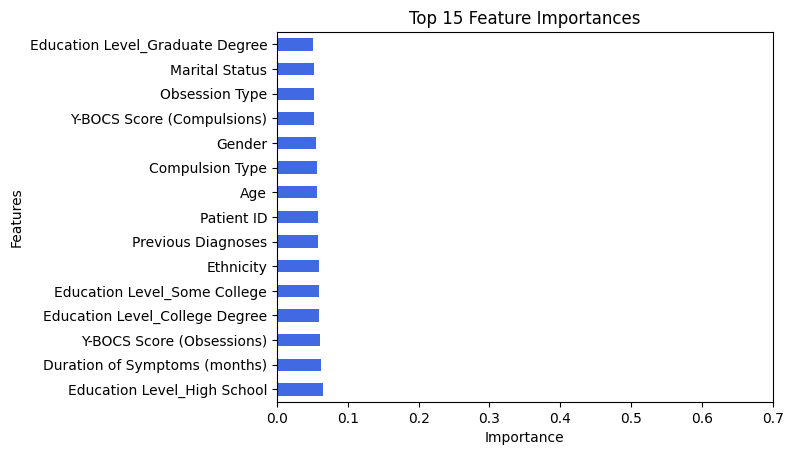

In [23]:
# Dropping the 'Medications' column to create the feature set
X_data_feature = train.drop(columns=['Medications'], axis=1)

# Assigning the 'Medications' column as the target variable
y_data_feature = train['Medications']

# Initialize and train the XGBoost Classifier model
model = XGBClassifier()



plt.xlim(0, 0.7)
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

print(train.isnull().sum())
X_data_feature = X_data_feature.fillna(0)  # Example: Fill missing values with 0
y_data_feature = y_data_feature.fillna(0)  # Example: Fill missing values with 0

print(X_data_feature.dtypes)  # Check the data types of each feature
X_data_feature = pd.get_dummies(X_data_feature)  # Convert categorical variables to one-hot encoding
print(y_data_feature.unique())  # Check the unique values in the target variable
# Dropping the 'Medications' column to create the feature set
X_data_feature = train.drop(columns=['Medications'], axis=1)

# Assigning the 'Medications' column as the target variable
y_data_feature = train['Medications']

# Check for missing values and fill if necessary
X_data_feature = X_data_feature.fillna(0)
y_data_feature = y_data_feature.fillna(0)

# Ensure all features are numeric (convert categorical to one-hot encoding if needed)
X_data_feature = pd.get_dummies(X_data_feature)

# Initialize and train the XGBoost Classifier model
model = XGBClassifier()
model.fit(X_data_feature, y_data_feature)

# Print a portion of the model's string representation (optional)
num_chr = 12  # Number of characters to print from the model's string representation
print(str(model)[:num_chr] + ': \n', model.feature_importances_)

# Extract the feature importances
feat_importances = pd.Series(model.feature_importances_, index=X_data_feature.columns)

# Plot the top 15 feature importances
feat_importances.nlargest(15).plot(kind='barh', color='royalblue')
plt.xlim(0, 0.7)
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


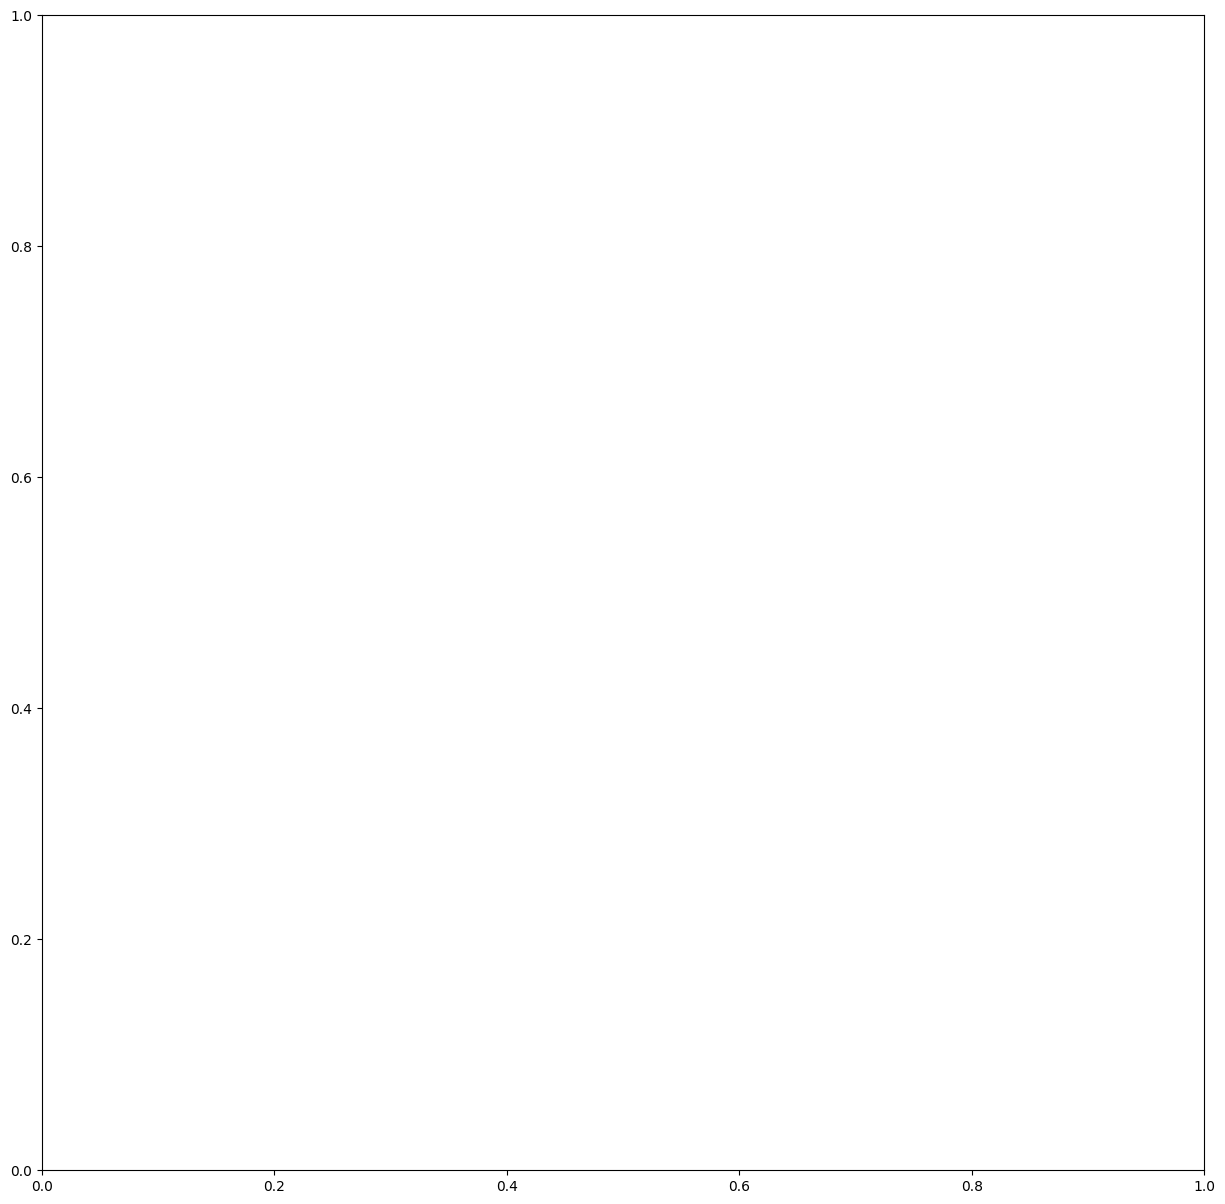

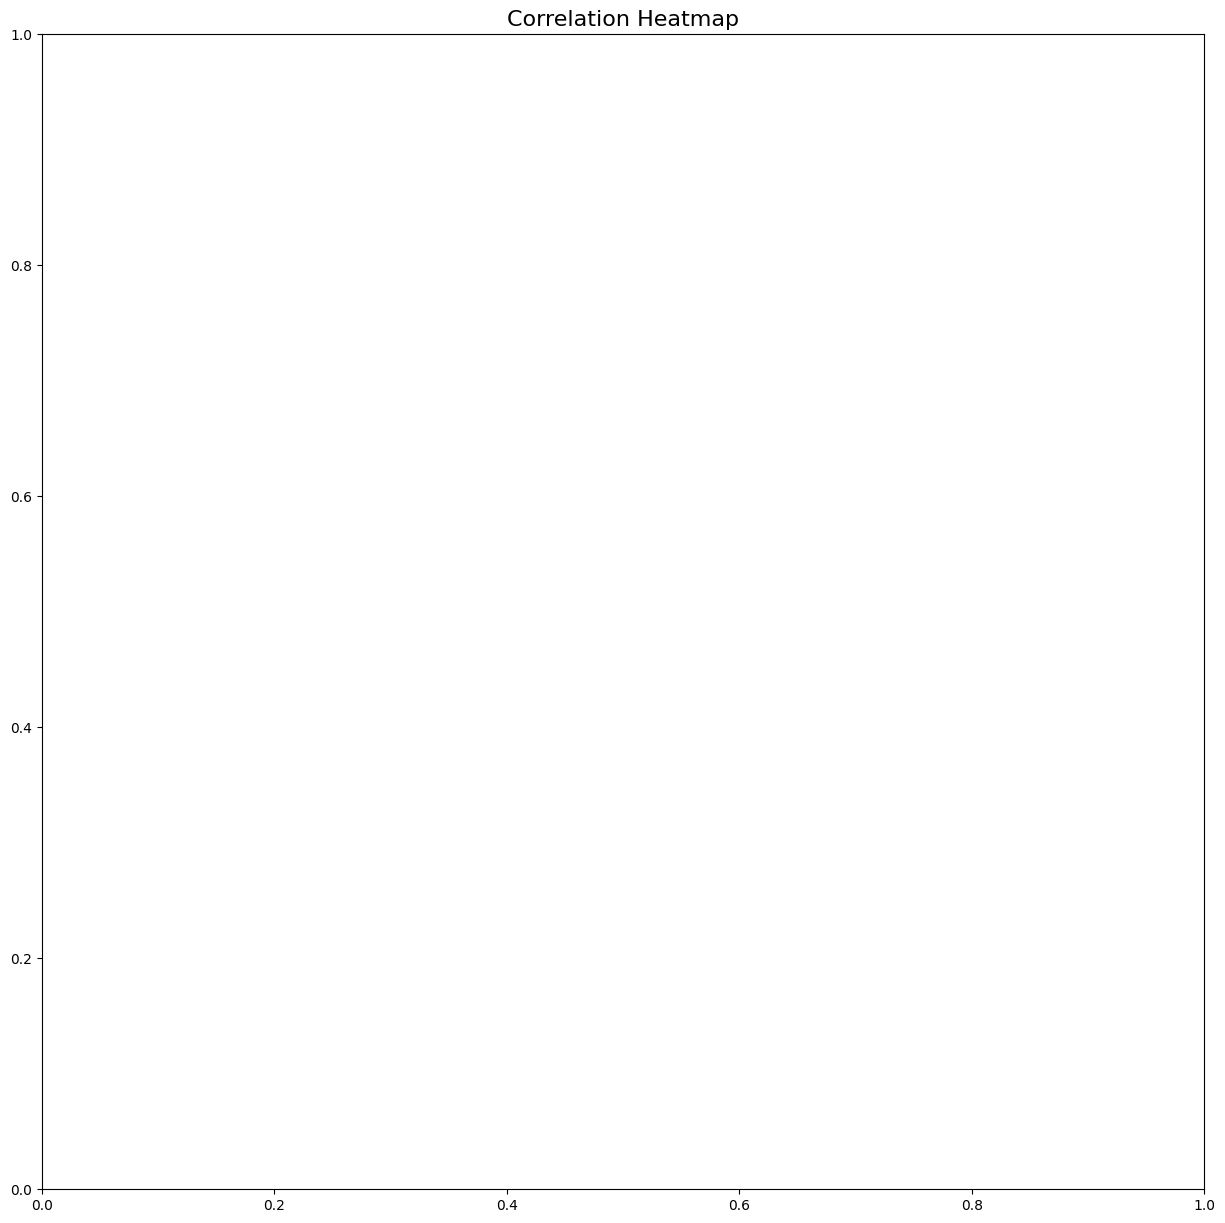

Patient ID                         int64
Age                                int64
Gender                             int64
Ethnicity                          int64
Marital Status                     int64
Education Level                   object
Duration of Symptoms (months)      int64
Previous Diagnoses               float64
Family History of OCD              int64
Obsession Type                     int64
Compulsion Type                    int64
Y-BOCS Score (Obsessions)          int64
Y-BOCS Score (Compulsions)         int64
Depression Diagnosis               int64
Anxiety Diagnosis                  int64
Medications                      float64
dtype: object
Patient ID                       0
Age                              0
Gender                           0
Ethnicity                        0
Marital Status                   0
Education Level                  0
Duration of Symptoms (months)    0
Previous Diagnoses               0
Family History of OCD            0
Obsession Type 

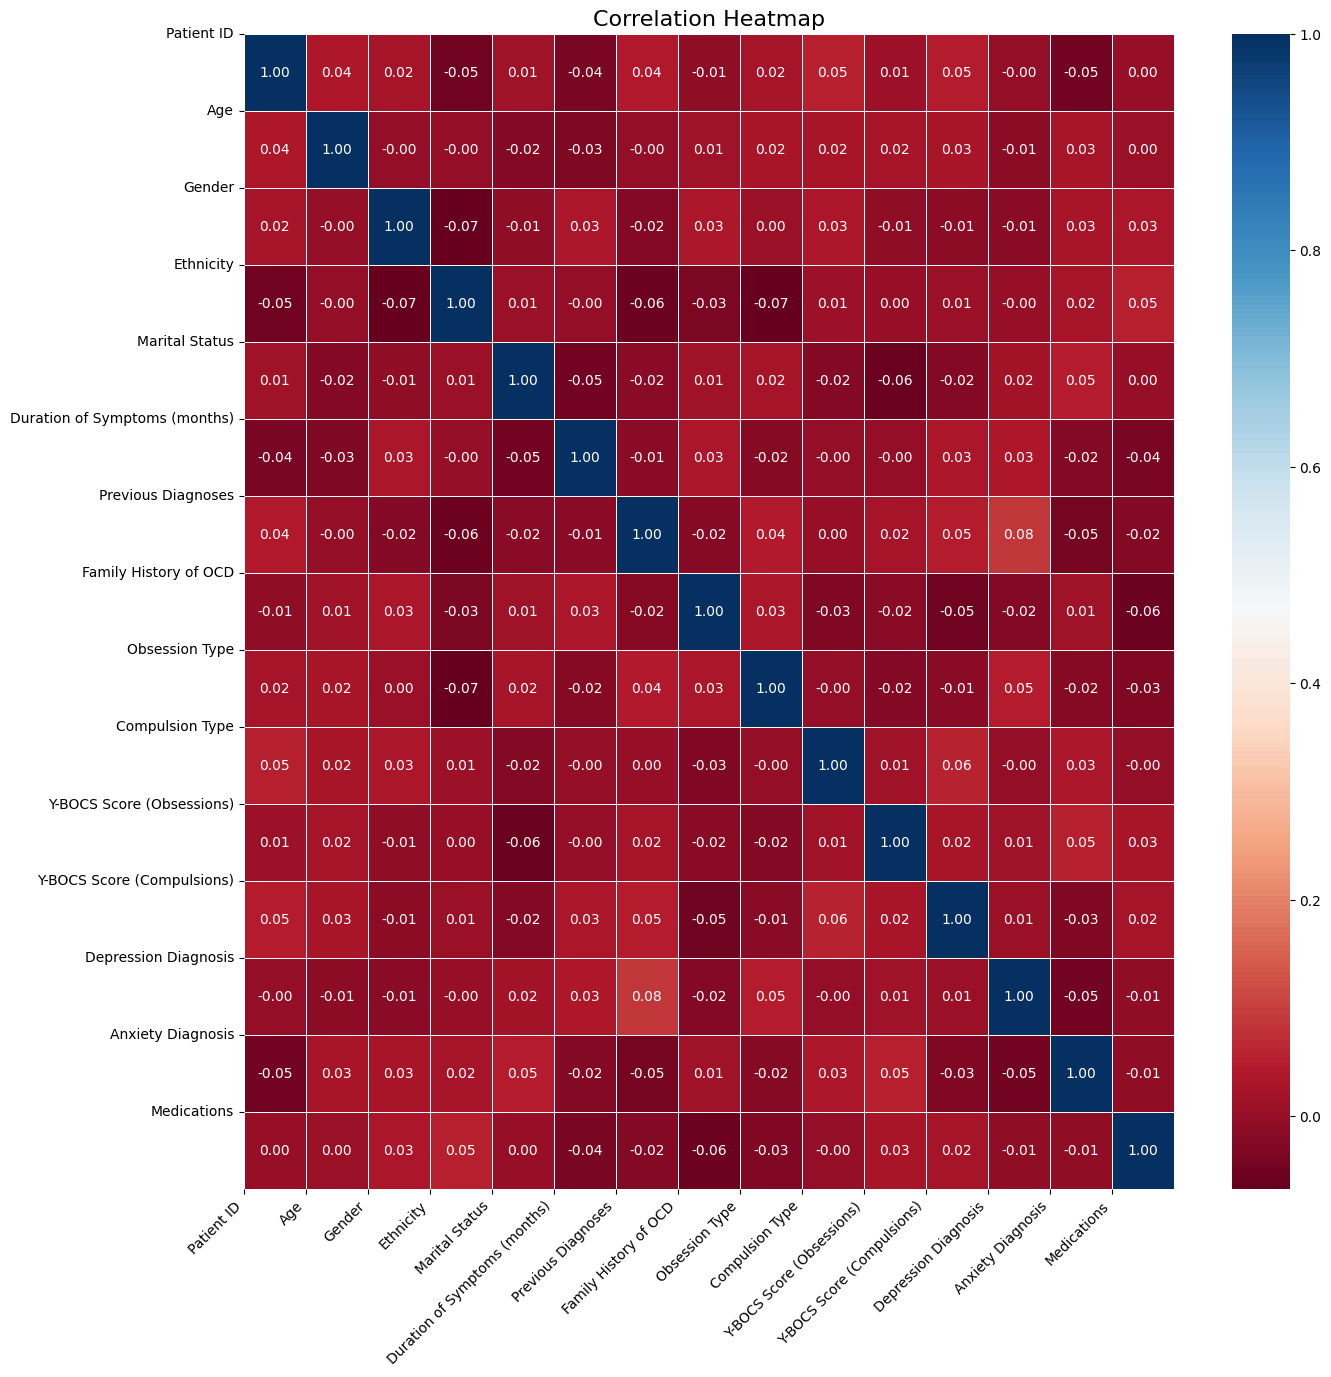

In [24]:
fig, ax = plt.subplots(figsize=(15, 15))


plt.show()

# Compute the Pearson correlation matrix


# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 15))

# Display the heatmap
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

print(train.dtypes)
train_numeric = train.select_dtypes(include=[np.number])
print(train.isnull().sum())
train_numeric = train_numeric.fillna(0)  # Replace NaN values with 0 (or use other appropriate filling methods)
# Select only numeric columns and fill any missing values
train_numeric = train.select_dtypes(include=[np.number]).fillna(0)

# Compute the Pearson correlation matrix
corr = train_numeric.corr(method='pearson')

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(15, 15))  # Adjust figure size as needed

# Create the heatmap with annotations
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f", linewidths=.5, ax=ax)

# Customize the ticks and labels
plt.xticks(ticks=range(len(corr.columns)), labels=corr.columns, rotation=45, ha='right', fontsize=10)
plt.yticks(ticks=range(len(corr.columns)), labels=corr.columns, fontsize=10)

# Display the heatmap
plt.title('Correlation Heatmap', fontsize=16)
plt.show()



In [29]:
train =pd.read_csv('/content/OCD Patient Dataset_ Demographics & Clinical Data.csv')

In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
train = pd.read_csv('/content/OCD Patient Dataset_ Demographics & Clinical Data.csv')

# Define X (features) and y (target)
X = train.drop(columns=['Medications'], axis=1)  # Replace 'Medications' with your target column
y = train['Medications']

# Step 1: Ensure X_train is a DataFrame
X_train = pd.DataFrame(X)

# Step 2: Convert categorical variables to one-hot encoded variables
X_train = pd.get_dummies(X_train)

# Step 3: Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Step 4: Fit and transform the X_train data using the scaler
X_train_scaled = scaler.fit_transform(X_train)

# Step 5: Convert the scaled data back to a DataFrame, preserving the original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Display the scaled DataFrame
X_train_scaled


Patient ID       Age  Duration of Symptoms (months)  \
0       0.000111  0.245614                       0.841880   
1       0.154712  0.894737                       0.743590   
2       0.019047  0.684211                       0.713675   
3       0.577300  0.157895                       0.512821   
4       0.535420  0.666667                       0.692308   
...          ...       ...                            ...   
1495    0.485297  0.350877                       0.200855   
1496    0.445088  0.017544                       0.658120   
1497    0.564937  0.385965                       0.401709   
1498    0.310871  0.333333                       0.871795   
1499    0.134106  0.000000                       0.363248   

      Y-BOCS Score (Obsessions)  Y-BOCS Score (Compulsions)  Gender_Female  \
0                         0.425                       0.250            1.0   
1                         0.525                       0.625            0.0   
2                         0.075                       0.100            0.0   
3                         0.350                       0.700            1.0   
4                         0.975                       0.450            1.0   
...                         ...                         ...            ...   
1495                      0.525                       0.825            0.0   
1496                      0.625                       0.400            1.0   
1497                      0.050                       0.375            0.0   
1498                      0.400                       0.175            1.0   
1499                      0.550                       0.850            0.0   

      Gender_Male  Ethnicity_African  Ethnicity_Asian  Ethnicity_Caucasian  \
0             0.0                1.0              0.0                  0.0   
1             1.0                1.0              0.0                  0.0   
2             1.0                0.0              0.0                  0.0   
3             0.0                0.0              0.0                  0.0   
4             0.0                0.0              0.0                  0.0   
...           ...                ...              ...                  ...   
1495          1.0                0.0              0.0                  0.0   
1496          0.0                0.0              0.0                  0.0   
1497          1.0                0.0              1.0                  0.0   
1498          0.0                0.0              0.0                  1.0   
1499          1.0                0.0              0.0                  1.0   

      Ethnicity_Hispanic  Marital Status_Divorced  Marital Status_Married  \
0                    0.0                      0.0                     0.0   
1                    0.0                      1.0                     0.0   
2                    1.0                      1.0                     0.0   
3                    1.0                      0.0                     1.0   
4                    1.0                      0.0                     1.0   
...                  ...                      ...                     ...   
1495                 1.0                      1.0                     0.0   
1496                 1.0                      1.0                     0.0   
1497                 0.0                      0.0                     1.0   
1498                 0.0                      0.0                     1.0   
1499                 0.0                      0.0                     0.0   

      Marital Status_Single  Education Level_College Degree  \
0                       1.0                             0.0   
1                       0.0                             0.0   
2                       0.0                             1.0   
3                       0.0                             1.0   
4                       0.0                             0.0   
...                     ...                             ...   
1495                    0.0      

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier,RidgeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier


In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train
test_size=0.2,random_state=2019)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_eval: ", X_eval.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_eval",y_eval.shape)


In [44]:
clf1 = SVC()
clf2 = LGBMClassifier()
clf3 = LogisticRegression()
clf4 = SGDClassifier()
clf5 = XGBClassifier(objective='multi:softmax')
clf6 = KNeighborsClassifier()
clf7 = RandomForestClassifier()
clf8 = ExtraTreesClassifier()
clf9 = HistGradientBoostingClassifier()

In [45]:
eclf = VotingClassifier(estimators=[('svm', clf1), ('LGBM', clf2), ('Log', clf3),
('SGD', clf4), ('XGBoost', clf5), ('KNeighbors', clf6), ('RandomForest', clf7),
('ExtraTrees', clf8), ('HistGradientBoosting', clf9)],voting='hard')

In [47]:
from sklearn.model_selection import cross_val_score


# Check for missing values in X_train and y_train
print("Missing values in X_train:\n", X_train.isnull().sum())
print("Missing values in y_train:\n", y_train.isnull().sum())

# Option 1: Fill missing values
# You can fill missing values in numerical columns with the mean, and categorical columns with the mode
X_train = X_train.fillna(X_train.mean())  # Fill numeric columns with their mean
X_train = X_train.fillna(X_train.mode().iloc[0])  # Fill categorical columns with their mode

# For the target variable y_train, you could drop NaN values or use a filling strategy
y_train = y_train.fillna(y_train.mode()[0])  # Fill missing values in y_train with the most frequent class

# Option 2: Alternatively, you can drop rows with missing values
# X_train = X_train.dropna()
# y_train = y_train.dropna()

# Now rerun your classifier with the cleaned data
for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9, eclf],
                      ['SVC', 'LGBM', 'Log', 'SGD', 'XGBoost', 'KNeighbors', 'RandomForest',
                       'ExtraTrees', 'HistGradientBoosting', 'Ensemble']):


    # Print the results
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))


Missing values in X_train:
 Patient ID                       0
Age                              0
Duration of Symptoms (months)    0
Y-BOCS Score (Obsessions)        0
Y-BOCS Score (Compulsions)       0
                                ..
Compulsion Type_Washing          0
Depression Diagnosis_No          0
Depression Diagnosis_Yes         0
Anxiety Diagnosis_No             0
Anxiety Diagnosis_Yes            0
Length: 1256, dtype: int64


NameError: name 'y_train' is not defined

In [ ]:
clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
clf4 = clf4.fit(X_train, y_train)

clf6 = clf6.fit(X_train, y_train)
clf7 = clf7.fit(X_train, y_train)
clf8 = clf8.fit(X_train, y_train)
clf9 = clf9.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 1200, number of used features: 38
[LightGBM] [Info] Start training from score -0.641187
[LightGBM] [Info] Start training from score -1.441103
[LightGBM] [Info] Start training from score -1.441103


Voting accuracy is: 0.000%


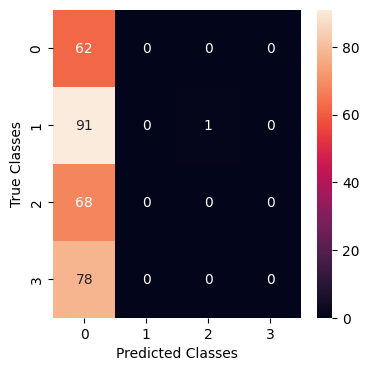

Voting accuracy is: 0.000%


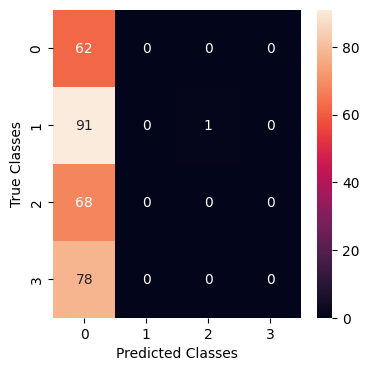

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_eval is the test data's true labels
# Check if y_eval or y_pred_Voting contains strings
if y_eval.dtype == 'object' or isinstance(y_pred_Voting[0], str):
    # Convert string labels to numeric using LabelEncoder
    le = LabelEncoder()
    y_eval = le.fit_transform(y_eval)


# Calculate accuracy
Voting_acc = accuracy_score(y_eval, y_pred_Voting)
print("Voting accuracy is: {0:.3f}%".format(Voting_acc * 100))

# Confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.show()

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the LabelEncoder
le = LabelEncoder()

# Check if y_eval or y_pred_Voting contains strings, and convert them to numeric
if y_eval.dtype == 'object' or isinstance(y_pred_Voting[0], str):
    # Fit the label encoder on y_eval and transform both y_eval and y_pred_Voting
    y_eval = le.fit_transform(y_eval)


# Calculate accuracy
Voting_acc = accuracy_score(y_eval, y_pred_Voting)
print("Voting accuracy is: {0:.3f}%".format(Voting_acc * 100))

# Confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.show()



